In [1]:
# from google.colab import files
# files.upload()

In [2]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# #Change the permission
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d mlg-ulb/creditcardfraud
# from zipfile import ZipFile
# file_name= "creditcardfraud.zip"

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print('Done')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.preprocessing import RobustScaler

#RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Classes Count in Credit card Fraud Dataset 
 0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Frequency')

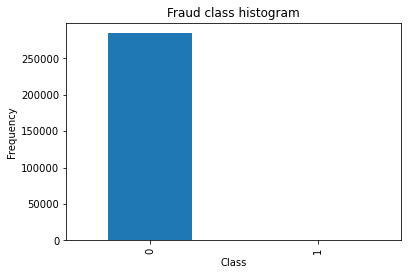

In [5]:
print(f'Classes Count in Credit card Fraud Dataset \n', pd.value_counts(df['Class'], sort = True).sort_index())
credit_classes = pd.value_counts(df['Class'], sort = True).sort_index()
credit_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
#Create independent and dependent features
columns = df.columns.tolist()
# Filter the columns 
columns = [c for c in columns if c not in ['Class']]
# print(columns)
#Store the variable we are predicting 
target = 'Class'
#define X and Y dataframe
X = df[columns]
Y= df[target]

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [7]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
nm = NearMiss()
X_us, y_us = nm.fit_sample(X,Y)
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.2)

X train shape =  (787, 30)
y train shape =  (787,)
Classes Count in train Dataset 
 0    388
1    399
Name: Class, dtype: int64




Text(0, 0.5, 'Frequency')

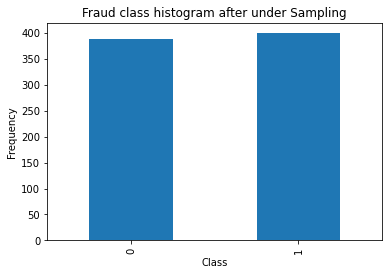

In [8]:
print(f'X train shape = ',X_train_us.shape)
print(f'y train shape = ',y_train_us.shape)
print(f'Classes Count in train Dataset \n', pd.value_counts(y_train_us, sort = True).sort_index())
print('\n')
credit_classes = pd.value_counts(y_train_us, sort = True).sort_index()
credit_classes.plot(kind = 'bar')
plt.title("Fraud class histogram after under Sampling")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [9]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
os = RandomOverSampler(random_state=1)
X_os, y_os= os.fit_sample(X,Y)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os , y_os, test_size=0.2)

X train shape =  (454904, 30)
y train shape =  (454904,)
Classes Count in train Dataset 
 0    227274
1    227630
Name: Class, dtype: int64




Text(0, 0.5, 'Frequency')

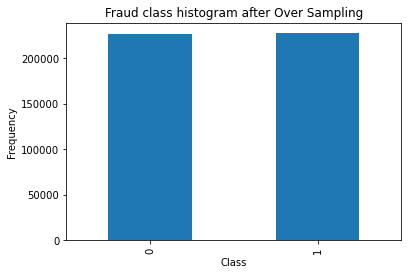

In [10]:
print(f'X train shape = ',X_train_os.shape)
print(f'y train shape = ',y_train_os.shape)
print(f'Classes Count in train Dataset \n', pd.value_counts(y_train_os, sort = True).sort_index())
print('\n')
credit_classes = pd.value_counts(y_train_os, sort = True).sort_index()
credit_classes.plot(kind = 'bar')
plt.title("Fraud class histogram after Over Sampling")
plt.xlabel("Class")
plt.ylabel("Frequency")

**Logistic Regression**

Logistic Regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. 

Hyperparameters for logistic Regression:

**C**: Its control parameter that controls penality strength. Higher the value of C, the less the model is regularized

**Solver**: its useful to try different solver as they are each solver performance or convergence is different from others.

**Penality** : Here we can specify regularization Techniques.

**Max_iter** : Maximum number of iterations taken for the solver to converge

**Hyper Parameter Tuning:**

Hyper-parameters are parameters that are not directly learn within estimators. It is advised to search the best set of hyper-parameter using the cross- validation score.

There are two approch to do it:

1. GridSearchCV
2. RandomizedSearchCV 

*GridSearchCV* consider all the combination from parameters specified in the parameter grid. Whereas, *RandomizedSearchCV* selects few candidates from all the combination.

We will be using GridSearchCV for our analysis. But you can feel free to try any of the hyper-tuning methods.

In [11]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
param_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000,2500]
}

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
logmodel= LogisticRegression()
param_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000,2500]
}
logcls_us = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1)
bestlogcls_us = logcls_us.fit(X_train_us, y_train_us)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.4930098  0.88815681 0.88815681 0.92121634
 0.94407841 0.93772676        nan        nan        nan 0.4930098
 0.88815681 0.88815681 0.92121634 0.93772676 0.93772676        nan
        nan        nan 0.4930098  0.88815681 0.88815681 0.92121634
 0.93772676 0.93772676        nan        nan        nan 0.4930098
 0.89196393 0.89196393 0.92630056 0.94407841 0.93772676        nan
        nan        nan 0.4930098  0.89196393 0.89196393 0.92630056
 0.93772676 0.93772676        nan        nan        nan 0.4930098
 0.89196393 0.89196393 0.92630056 0.93772676 0.93772676        nan
        nan        nan 0.4930098  0.89323136 0.89323136 0.92502346
 0.94407841 0.93772676        nan        nan        nan 0.4930098
 0.89323136 0.89323136 0.92502346 0.93772676 0.93772676        nan
        nan        nan 0.4930098  0.89323136 0.89323136 0

In [13]:
bestlogcls_us.best_estimator_

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [14]:
predict_us = bestlogcls_us.predict(X_test_us)

In [15]:
def compute_roc(y_true, y_pred, plot=False):
    """
    TODO
    :param y_true: ground truth
    :param y_pred: predictions
    :param plot:
    :return:
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC (AUC = %0.4f)' % auc_score)
        plt.legend(loc='lower right')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.show()
        print(f'\n AUC Score:', auc_score)

    return 

Confusion Matrix:
  [[101   3]
 [  5  88]]

 Recall: 0.946236559139785

 Accuracy Score: 0.9593908629441624

 Precision Score: 0.967032967032967

 F1 Score: 0.9565217391304348


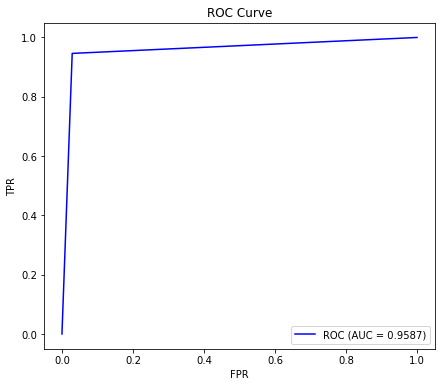


 AUC Score: 0.9586952026468155


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc

def model_performance(y_test, y_pred):
  print(f'Confusion Matrix:\n ',confusion_matrix(y_test, y_pred))
  print(f'\n Recall:', recall_score(y_test, y_pred))
  print(f'\n Accuracy Score:', accuracy_score(y_test, y_pred))
  print(f'\n Precision Score:', precision_score(y_test, y_pred))
  print(f'\n F1 Score:' ,f1_score(y_test, y_pred))
  compute_roc(y_test, y_pred, plot=True)

  return 
model_performance(y_test_us,predict_us)

In [17]:
def compute_roc(y_true, y_pred, plot=False):
    """
    TODO
    :param y_true: ground truth
    :param y_pred: predictions
    :param plot:
    :return:
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC (AUC = %0.4f)' % auc_score)
        plt.legend(loc='lower right')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.show()
        print(f'\n AUC Score:', auc_score)

    return 

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.94013682 0.94601938 0.94602158 0.94393982
 0.94993009 0.94993229        nan        nan        nan 0.94046436
 0.94601938 0.94602158 0.94393982 0.94993009 0.94993229        nan
        nan        nan 0.9420581  0.94867928 0.94867928 0.94641287
 0.94993009 0.94993229        nan        nan        nan 0.9420647
 0.94867928 0.94867928 0.94641287 0.94993009 0.94993229        nan
        nan        nan 0.94407171 0.94804838 0.94804838 0.94658433
 0.94993009 0.94993229        nan        nan        nan 0.94407611
 0.94804838 0.94804838 0.94658433 0.94993009 0.94993229        nan
        nan        nan 0.94723062 0.94875402 0.94875402 0.94691187
 0.94993009 0.94993229        nan        nan        nan 0.94722403
 0.94875402 0.94875402 0.94691187 0.94993009 0.94993229        nan
        nan        nan 0.94749442 0.9485342  0.9485342

Confusion Matrix:
  [[55813  1228]
 [ 4436 52249]]

 Recall: 0.9217429655111582

 Accuracy Score: 0.9501960853278933

 Precision Score: 0.9770368569665464

 F1 Score: 0.9485848114594869


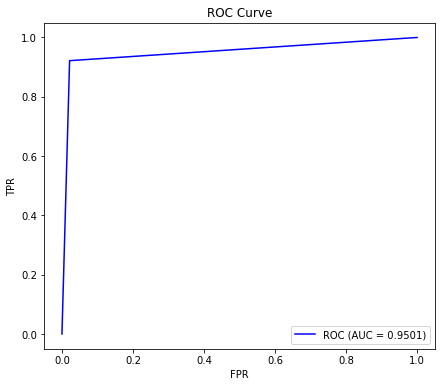


 AUC Score: 0.9501072955919599


In [18]:
#logistic Regression for oversampling:
param_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000]
}
logcls_os = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1)
bestlogcls_os = logcls_os.fit(X_train_os, y_train_os)
predict_os = bestlogcls_os.predict(X_test_os)
model_performance(y_test_os,predict_os)

In [19]:
bestlogcls_os.estimator

LogisticRegression()

In [20]:
logcls_us = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1)
bestlogcls_us = logcls_us.fit(X_train_us, y_train_us)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.4930098  0.88815681 0.88815681 0.92121634
 0.94407841 0.93772676        nan        nan        nan 0.4930098
 0.88815681 0.88815681 0.92121634 0.93772676 0.93772676        nan
        nan        nan 0.4930098  0.89196393 0.89196393 0.92630056
 0.94407841 0.93772676        nan        nan        nan 0.4930098
 0.89196393 0.89196393 0.92630056 0.93772676 0.93772676        nan
        nan        nan 0.4930098  0.89323136 0.89323136 0.92502346
 0.94407841 0.93772676        nan        nan        nan 0.4930098
 0.89323136 0.89323136 0.92502346 0.93772676 0.93772676        nan
        nan        nan 0.84625432 0.90339496 0.90339496 0.9237512
 0.94407841 0.93772676        nan        nan        nan 0.84625432
 0.90339496 0.90339496 0.9237512  0.93772676 0.93772676        nan
        nan        nan 0.85256727 0.91991505 0.91991505 0

In [21]:
predict_us = bestlogcls_us.predict(X_test_us)


**Support Vector Machine**

It constructs a hyperplane which can be used for classification, regression or other tasks like outliers detection. 

A svm is asupervised learning model that uses classification algorithm for two-group classification problems. 

Its important to note that svm performs well with limited amount of data to analyze.

Hyper Parameter for SVM:(https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/)

**C:** This is also know as penalty that can take on a range of values and has a dramatic effect on the shape of the resulting regions for each class

**gamma:**  Is the parameter of a Gaussian Kernel (to handle non-linear classification)

**Kernel:** This control the manner in which the input variables will be projected. The most common kernel is RGF


In [22]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, n_jobs= -1, cv= 3)
grid.fit(X_train_us,y_train_us)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [23]:
grid.estimator

SVC()

Confusion Matrix:
  [[102   2]
 [  3  90]]

 Recall: 0.967741935483871

 Accuracy Score: 0.9746192893401016

 Precision Score: 0.9782608695652174

 F1 Score: 0.972972972972973


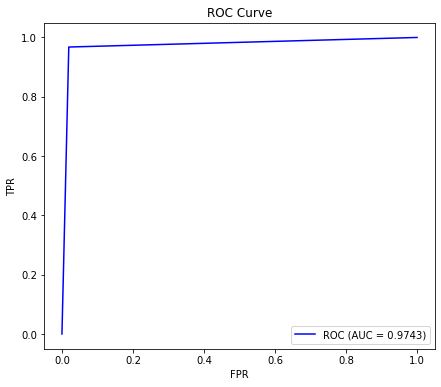


 AUC Score: 0.9742555831265508


In [24]:
predict_us = grid.predict(X_test_us)
model_performance(y_test_us,predict_us)

In [25]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_os,y_train_os)

SGDClassifier()

Confusion Matrix:
  [[55863  1178]
 [ 4559 52126]]

 Recall: 0.9195730792978742

 Accuracy Score: 0.9495541916536236

 Precision Score: 0.9779003451898545

 F1 Score: 0.9478402385693114


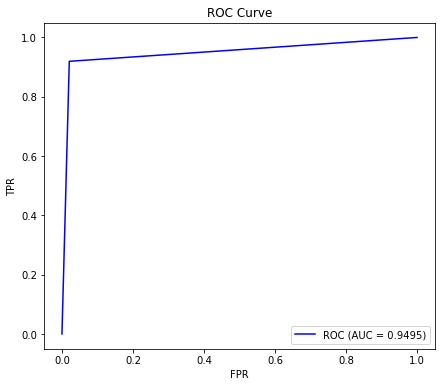


 AUC Score: 0.9494606337216217


In [26]:
predict_os = clf.predict(X_test_os)
model_performance(y_test_os,predict_os)

In [27]:
from sklearn.tree  import DecisionTreeClassifier 
tree_cf = DecisionTreeClassifier(max_depth=3)
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
dtree_gscv = GridSearchCV(tree_cf, param_grid, cv=3,verbose= 2)
dtree_gscv.fit(X_train_us,y_train_us)
dtree_gscv.best_params_

Fitting 3 folds for each of 26 candidates, totalling 78 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini,

{'criterion': 'entropy', 'max_depth': 13}

Confusion Matrix:
  [[97  7]
 [ 6 87]]

 Recall: 0.9354838709677419

 Accuracy Score: 0.934010152284264

 Precision Score: 0.925531914893617

 F1 Score: 0.9304812834224598


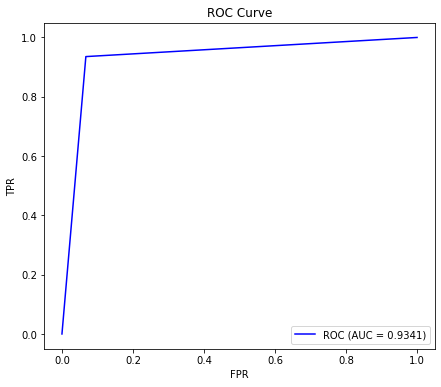


 AUC Score: 0.9340880893300249


In [28]:
predict_tree_us= dtree_gscv.predict(X_test_us)
model_performance(y_test_us, predict_tree_us)

In [29]:
tree_cf_os = DecisionTreeClassifier(max_depth=3)
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 20)}
dtree_gscv_os = GridSearchCV(tree_cf_os , param_grid, cv=3,verbose= 2)
dtree_gscv_os.fit(X_train_os,y_train_os)
dtree_gscv_os.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   1.6s
[CV] END ........................criterion=gini, max_depth=2; total time=   1.6s
[CV] END ........................criterion=gini, max_depth=2; total time=   1.7s
[CV] END ........................criterion=gini, max_depth=3; total time=   2.5s
[CV] END ........................criterion=gini, max_depth=3; total time=   2.8s
[CV] END ........................criterion=gini, max_depth=3; total time=   2.6s
[CV] END ........................criterion=gini, max_depth=4; total time=   3.2s
[CV] END ........................criterion=gini, max_depth=4; total time=   3.2s
[CV] END ........................criterion=gini, max_depth=4; total time=   3.3s
[CV] END ........................criterion=gini, max_depth=5; total time=   4.6s
[CV] END ........................criterion=gini, max_depth=5; total time=   4.3s
[CV] END ........................criterion=gini

[CV] END ....................criterion=entropy, max_depth=17; total time=   9.3s
[CV] END ....................criterion=entropy, max_depth=18; total time=   7.9s
[CV] END ....................criterion=entropy, max_depth=18; total time=   7.9s
[CV] END ....................criterion=entropy, max_depth=18; total time=   8.0s
[CV] END ....................criterion=entropy, max_depth=19; total time=   8.2s
[CV] END ....................criterion=entropy, max_depth=19; total time=   8.4s
[CV] END ....................criterion=entropy, max_depth=19; total time=   8.0s


{'criterion': 'entropy', 'max_depth': 19}

Confusion Matrix:
  [[56976    65]
 [    0 56685]]

 Recall: 1.0

 Accuracy Score: 0.999428450837979

 Precision Score: 0.9988546255506608

 F1 Score: 0.999426984616741


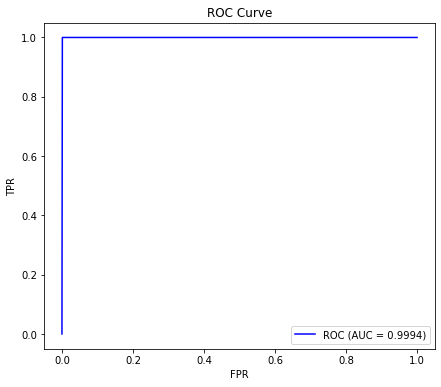


 AUC Score: 0.9994302343928051


In [30]:
predict_tree_os= dtree_gscv_os.predict(X_test_os)
model_performance(y_test_os, predict_tree_os)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_us = RandomForestClassifier()

param_grid = [{'n_estimators': [5,10, 25,50,100,250,500,1000],
               'criterion':['gini','entropy'] 
 }
]
rf_grid_us = GridSearchCV(rf_us, param_grid= param_grid, verbose=2, cv =3)
best_rf_grid_us = rf_grid_us.fit(X_train_us, y_train_us)
best_rf_grid_us.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .....................criterion=gini, n_estimators=5; total time=   0.0s
[CV] END .....................criterion=gini, n_estimators=5; total time=   0.0s
[CV] END .....................criterion=gini, n_estimators=5; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=10; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=10; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=10; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=25; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=25; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=25; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=50; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=50; total time=   0.0s
[CV] END ....................criterion=gini, n_e

{'criterion': 'gini', 'n_estimators': 50}

Confusion Matrix:
  [[102   2]
 [  4  89]]

 Recall: 0.956989247311828

 Accuracy Score: 0.9695431472081218

 Precision Score: 0.978021978021978

 F1 Score: 0.967391304347826


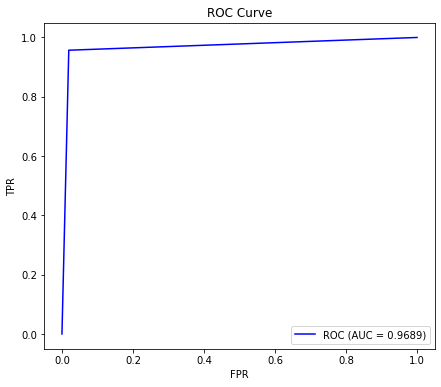


 AUC Score: 0.9688792390405293


In [32]:
pred_us =  best_rf_grid_us.predict(X_test_us)
model_performance(y_test_us, pred_us)

In [33]:
rf_os = RandomForestClassifier()
param_grid = [
{'n_estimators': [5,10, 25,50,100],'criterion':['gini','entropy'] 
 }
]

rf_grid_os = GridSearchCV(rf_os, param_grid= param_grid, verbose=2, cv =3)
best_rf_grid_os = rf_grid_os.fit(X_train_os, y_train_os)
best_rf_grid_os.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....................criterion=gini, n_estimators=5; total time=   5.2s
[CV] END .....................criterion=gini, n_estimators=5; total time=   5.3s
[CV] END .....................criterion=gini, n_estimators=5; total time=   5.1s
[CV] END ....................criterion=gini, n_estimators=10; total time=  10.5s
[CV] END ....................criterion=gini, n_estimators=10; total time=  10.1s
[CV] END ....................criterion=gini, n_estimators=10; total time=  10.9s
[CV] END ....................criterion=gini, n_estimators=25; total time=  27.0s
[CV] END ....................criterion=gini, n_estimators=25; total time=  26.1s
[CV] END ....................criterion=gini, n_estimators=25; total time=  26.0s
[CV] END ....................criterion=gini, n_estimators=50; total time=  51.7s
[CV] END ....................criterion=gini, n_estimators=50; total time=  52.5s
[CV] END ....................criterion=gini, n_e

{'criterion': 'gini', 'n_estimators': 5}

Confusion Matrix:
  [[57035     6]
 [    0 56685]]

 Recall: 1.0

 Accuracy Score: 0.9999472416158135

 Precision Score: 0.9998941630946712

 F1 Score: 0.9999470787468248


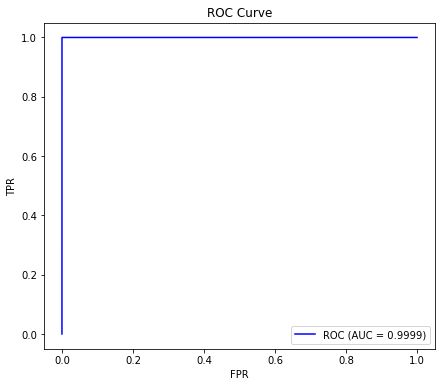


 AUC Score: 0.9999474062516436


In [34]:
pred_os =  best_rf_grid_os.predict(X_test_os)
model_performance(y_test_os, pred_os)

In [35]:
import tensorflow as tf
import numpy as np
from tensorflow import keras


In [36]:
model = tf.keras.Sequential([
    keras.layers.Dense(units=10, input_shape=X_train_os.shape[1:], activation ='relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='binary_crossentropy',
          optimizer='sgd',
          metrics=['accuracy'])
model.fit(X_train_os, y_train_os, epochs= 30)

Epoch 1/30
14216/14216 [==============================] - 8s 557us/step - loss: 0.1335 - accuracy: 0.9434
Epoch 2/30
14216/14216 [==============================] - 7s 527us/step - loss: 0.0883 - accuracy: 0.9628
Epoch 3/30
14216/14216 [==============================] - 7s 513us/step - loss: 0.0680 - accuracy: 0.9739
Epoch 4/30
14216/14216 [==============================] - 8s 552us/step - loss: 0.0561 - accuracy: 0.9798
Epoch 5/30
14216/14216 [==============================] - 8s 578us/step - loss: 0.0486 - accuracy: 0.98250s - loss: 0.0487 - accura
Epoch 6/30
14216/14216 [==============================] - 9s 614us/step - loss: 0.0428 - accuracy: 0.9861
Epoch 7/30
14216/14216 [==============================] - 7s 520us/step - loss: 0.0386 - accuracy: 0.9897
Epoch 8/30
14216/14216 [==============================] - 8s 543us/step - loss: 0.0356 - accuracy: 0.9907
Epoch 9/30
14216/14216 [==============================] - 8s 562us/step - loss: 0.0335 - accuracy: 0.9910
Epoch 10/30
14216/14

Confusion Matrix:
  [[56570   471]
 [    0 56685]]

 Recall: 1.0

 Accuracy Score: 0.9958584668413556

 Precision Score: 0.991759395339072

 F1 Score: 0.9958626505389095


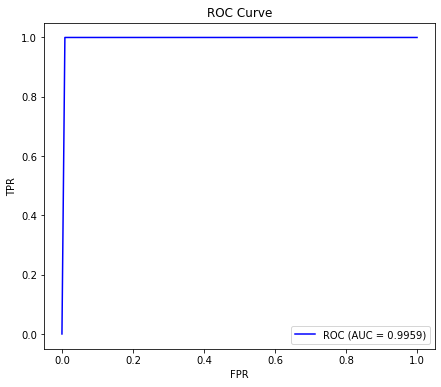


 AUC Score: 0.995871390754019


In [38]:
pred_os = model.predict(X_test_os)
y_pred_bool = np.round(pred_os)
pred_os = y_pred_bool.tolist()
model_performance(y_test_os, pred_os)